In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dx = 200
dz = 200

max_depth = 30000
max_distance = 30000

x = np.linspace(-max_distance, max_distance, int(round(2 * max_distance / dx) + 1))
z = np.linspace(0, max_depth, int(round(max_depth / dz)) + 1)

In [14]:
x.shape

(301,)

In [ ]:
def manning_Ingebritsen_1999(depth, log_kd=-14, lambda_k=3.2):
    """
    calculates crustal permeability from the power law of
    Manning and Ingebritsen (1999) https://doi.org/10.1130/0091-7613(1999)027<1107:GIOAPD>2.3.CO;2

    depth is in km
    """
    return log_kd - lambda_k * np.log(depth)


def kuang_jiao_2014(depth, log_kr=-25.4, log_ks=-11.5, alpha=0.25):
    """
    calculates crustal permeability from modified power law of
    Kuang and Jiao (2014) https://doi.org/10.1002/2014GL061999

    depth is in km
    """

    return log_kr + (log_ks - log_kr) * (1 + depth) ** (-alpha)

C:\Users\jpeacock\AppData\Local\Temp\1\ipykernel_22156\2217590515.py:6: RuntimeWarning: divide by zero encountered in log
  return log_kd - lambda_k * np.log(depth)


<function matplotlib.pyplot.show(close=None, block=None)>

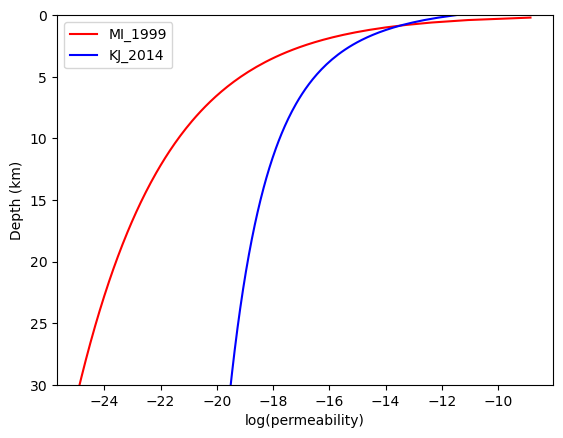

In [8]:
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(manning_Ingebritsen_1999(z / 1000), z/1000, "r")
l2, = ax.plot(kuang_jiao_2014(z / 1000), z/1000, "b")

ax.legend( [l1, l2], ["MI_1999", "KJ_2014"],)
ax.set_ylabel("Depth (km)")
ax.set_xlabel("log(permeability)")
ax.set_ylim(z.max()/1000, 0)

plt.show

In [18]:
br_temperatures = np.array([25, 138, 255, 380, 515, 630, 750, 900, 1000, 1180, 1200])
br_depths = np.linspace(0, 50000, 11)

br_temp_func = np.interp(z, br_depths, br_temperatures)

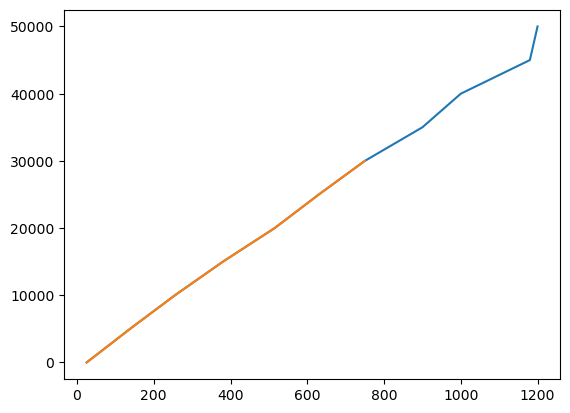

In [19]:
plt.plot(br_temperatures, br_depths)
plt.plot(br_temp_func, z)

In [21]:
permeability_change = np.array([1.3, 1.25, 1.05, 1., 1, 1.025, 1.05, 1.075])
perm_depth = np.array([0, 2, 5, 10, 15, 20, 25, 30]) * 1000

In [35]:
model = []
for zz in z:
    permeability = kuang_jiao_2014(zz / 1000)
    temperature = np.interp(zz, br_depths, br_temperatures)
    perm_factor = np.interp(zz, perm_depth, permeability_change) - 1
    for xx in x:
        entry = {}
        entry["x_m"] = xx
        entry["depth_m"] = -zz
        if abs(xx) <= 500:
            entry["log_permeability"] = permeability * (1 - perm_factor)
        else:
            entry["log_permeability"] = permeability
        entry["temperature_c"] = temperature
        model.append(entry)

df = pd.DataFrame(model)
df.to_csv(r"c:\Users\jpeacock\OneDrive - DOI\Geothermal\GreatBasin\taron_heat_flow\single_vertical_fracture_initial_model_01.csv", index=False)

(-30000.0, 30000.0)

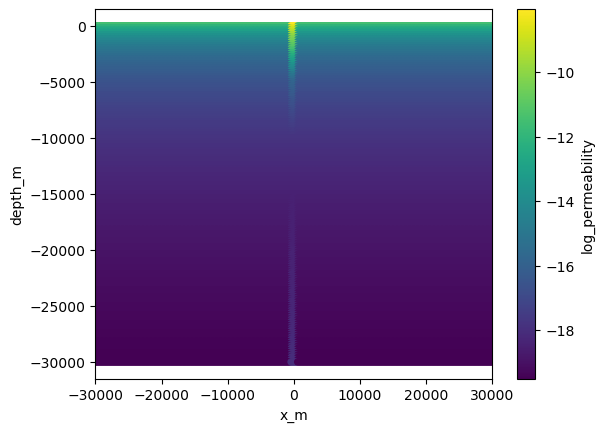

In [33]:
ax = df.plot.scatter(x="x_m", y="depth_m", c="log_permeability")
ax.set_xlim(x.min(), x.max())

(-30000.0, 30000.0)

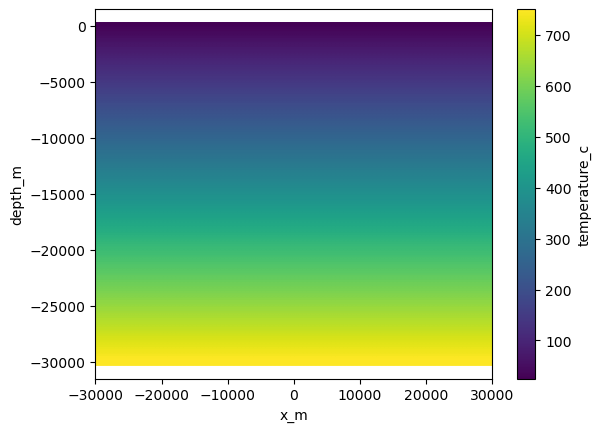

In [34]:
ax2 = df.plot.scatter(x="x_m", y="depth_m", c="temperature_c")
ax2.set_xlim(x.min(), x.max())